# Homework 8: Large Language Models & Prompting


## Total Points: 104 points
- *Warning*: Start this assignment early as it is dependent on the OpenAI API!
- **Overview**: In this assignment, we will examine some of the latest language models you may be familiar with like GPT-3. We'll cover:

  - Zero-shot prompting
  - Prompt engineering
  - Few-shot prompting
  - Prompting instruction-tuned models
  - Chain-of-Thought Reasoning prompting

- **OpenAI Account Setup**: You will need an OpenAI account and API key, you can [sign up here](https://platform.openai.com/signup?launch) and learn [how to make an API key here](https://help.openai.com/en/articles/4936850-where-do-i-find-my-secret-api-key). The OpenAI API is paid, however, we this homework will stay well under the free $5 credit given to each account. Be careful not to exhaust your free OpenAI credits while testing, you can check [on this page here](https://platform.openai.com/account/usage). To avoid exhausting your credits quickly, avoid running cells over and over again after you've completed an exercise.

- **Deliverables:** This assignment has several deliverables:
  - Code (this notebook) *(Automatic Graded)*
    - Section 1: answers to questions
    - Section 3: answers to questions
    - Section 4: answers to question
    - Section 5: answers to question
  - Write Up (Writeup.pdf) *(Manually Graded)*
    - Section 2: answers to questions
    - Section 3: answers to question
    - Section 4: answers to question
    - Section 5: answers to question

- **Inputs/Outputs:**
  - Section 1: Problems 1.1-1.5
    - Write a good quality prompt
    - Input: a string that expresses a high-quality prompt
    - Output: a string that expresses an answer to a prompt
  - Section 2: Problem 2.1
    - Manually graded answer to a question
  - Section 2: Problem 2.2
    - Write a good quality prompt and asseble the list of positive & negative
verbalizers
    - Inputs:
        - a string that expresses a high-quality prompt
        - a list of positive verbalizers
        - a list of negative verbalizers
    - Outputs:
        - a list of predicted and true labels
        - a number of correctly predicted labels
  - Section 3: Problems 3.1-3.2
    - Write a good quality few-short prompt
    - Input: a string that expresses a high-quality prompt
    - Output: a string that expresses an answer to a prompt
  - Section 3: Problem 3.3
    - Come up with three examples where the given model struggles with a
zero-shot task, but performs well with a few-short prompting approach
  - Section 4: Problem 4.1
    - Write a good quality few-short prompt
    - Input: a string that expresses a high-quality prompt
    - Output: a string that expresses an answer to a prompt
  - Section 4: Problem 4.2
    - Come up with three examples where the non-instruction-tuned model
performs poorly and an instruction-tuned model is required to improve
the performance
  - Section 5: Problem 5.1
    - Run the given experiments, report on the results in a table/plot, and
write about your observations and conclusions.


---
- **Grading**: We will use the auto-grading system called `PennGrader`. To complete the homework assignment, you should implement anything marked with `#TODO` and run the cell with `#PennGrader` note.


## Recommended Readings
- [Language Models are Few-Shot Learners](https://arxiv.org/pdf/2005.14165.pdf). Tom B. Brown, Benjamin Mann, Nick Ryder, Melanie Subbiah, Jared Kaplan, ...others. ArXiV 2020.
- [Pre-train, Prompt, and Predict: A Systematic Survey of Prompting Methods in Natural Language Processing](https://arxiv.org/pdf/2107.13586.pdf). Pengfei Liu, Weizhe Yuan, Jinlan Fu, Zhengbao Jiang, Hiroaki Hayashi, Graham Neubig. ACM Computing Surveys 2021.
- [Best practices for prompt engineering with OpenAI API](https://help.openai.com/en/articles/6654000-best-practices-for-prompt-engineering-with-openai-api). Jessica Shieh. OpenAI 2023.
- [Training language models to follow instructions with human feedback](https://arxiv.org/pdf/2203.02155.pdf). Long Ouyang, Jeff Wu, Xu Jiang, Diogo Almeida, Carroll L. Wainwright, ...others. ArXiV 2020.
- [Chain-of-Thought Prompting Elicits Reasoning in Large Language Models](https://arxiv.org/pdf/2201.11903.pdf). Jason Wei, Xuezhi Wang, Dale Schuurmans, Maarten Bosma, brian ichter, Fei Xia, Ed H. Chi, Quoc V Le, Denny Zhou. NeurIPS 2022.

## To get started, **make a copy** of this colab notebook into your google drive!

## Setup 1: PennGrader Setup

In [2]:
!pip install -U datasets huggingface_hub fsspec

  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)


In [3]:
## DO NOT CHANGE ANYTHING, JUST RUN
%%capture
!pip install penngrader-client

In [4]:
%%writefile notebook-config.yaml

grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Writing notebook-config.yaml


In [5]:
!cat notebook-config.yaml


grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'


In [6]:
from penngrader.grader import *

## TODO - Start
STUDENT_ID = 62502470 # YOUR PENN-ID GOES HERE AS AN INTEGER#
## TODO - End

SECRET = STUDENT_ID
grader = PennGrader('notebook-config.yaml', 'CIS5300_OL_23Su_HW8', STUDENT_ID, SECRET)

PennGrader initialized with Student ID: 62502470

Make sure this correct or we will not be able to store your grade


In [7]:
# check if the PennGrader is set up correctly
# do not chance this cell, see if you get 4/4!
name_str = 'Rui Jiang'
grader.grade(test_case_id = 'name_test', answer = name_str)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Setup 2: Dataset / Packages
- **Run the following cells and enter your OpenAI API Key!**

In [8]:
%%capture
!pip install openai datasets

In [9]:
from openai import OpenAI
from time import sleep
from datasets import load_dataset

IMDB_DATASET = load_dataset("imdb", split='train').shuffle(42)[0:200]
IMDB_DATASET_X = IMDB_DATASET['text']
IMDB_DATASET_Y = IMDB_DATASET['label']
del IMDB_DATASET

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [10]:
from getpass import getpass
import os

print('Enter OpenAI API key:')
openai_api_key = getpass()

os.environ['OPENAI_API_KEY']=openai_api_key
client = OpenAI()

Enter OpenAI API key:
··········


In [11]:
 OPENAI_API_KEY = openai_api_key

In [12]:
import openai

cache = {}
def run_gpt3(prompt, return_first_line = True, instruction_tuned = False):
    # Return the response from the cache if we have already run this
    cache_key = (prompt, return_first_line, instruction_tuned)
    if cache_key in cache:
        return cache[cache_key]

    response = ""

    # Select the model
    if instruction_tuned:
        model = "gpt-3.5-turbo-instruct"
    else:
        # You may also use "davinci-002"
        # model = "babbage-002"
        model = "davinci-002"

    # Send the prompt to GPT-3
    for i in range(0,60,6):
        try:
            response = client.completions.create(
                model=model,
                prompt=prompt,
                temperature=0,
                max_tokens=100,
                top_p=1,
                frequency_penalty=0.0,
                presence_penalty=0.0,
            ).choices[0].text.strip()
            break
        except openai.RateLimitError as e:
            print(e)
            sleep(i)

        except Exception as e:
            print(e)
            break

    # Parse the response
    if return_first_line:
        final_response = response.split('\n')[0]
    else:
        final_response = response

    # Cache and return the response
    cache[cache_key] = final_response
    return final_response

# Section 1: Exploring Prompting (15 points)
**Background:** Prompting is a way to guide a language model, which is ultimately just a model that predicts the most likely next sequence of words, to complete some arbitrary task you want it to complete. We'll walk through a few examples and then you'll try creating your own prompts.

A language model will "complete" (just like autocomplete) your prompt with what words are most likely to come next. We demonstrate this is the case by showing how GPT-3 completes movie quotes, when giving it the beginning of the quote:

In [13]:
print(run_gpt3("Life is like a box of chocolates,"))

you never know what you’re gonna get.” – Forrest Gump


In [ ]:
print(run_gpt3("Life is like a box of chocolates,"))
print(run_gpt3("With great power,"))
print(run_gpt3("The name's Bond."))
print(run_gpt3("Houston, we"))
print(run_gpt3("I've a feeling we're not in"))

you never know what you're gonna get. (laughing)
comes great responsibility. The same goes for the power of the internet. The internet is a powerful tool, but it can also be a dangerous tool. The internet is a powerful tool, but it can also be a dangerous tool. The internet is a powerful tool, but it can also be a dangerous tool. The internet is a powerful tool, but it can also be a dangerous tool. The internet is a powerful tool, but it can also be a dangerous tool. The internet is a powerful tool
James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James Bond. James
have a problem.
Kansas anymore.


Now imagine we give a prompt like this:

In [ ]:
print(run_gpt3("Question: Who was the first president of the United States? Answer:"))

George Washington. The first president of the United States was George Washington. He was the first president of the United States. He was the first president of the United States. He was the first president of the United States. He was the first president of the United States. He was the first president of the United States. He was the first president of the United States. He was the first president of the United States. He was the first president of the United States. He was the first president of


By posing a question and writing "Answer:" at the end, we make it such that the most likely next sequence of words is the answer to the question! This is the key to large language models being able to perform arbitrary tasks, even though they are only trained to predict the next word.

We can parameterize this prompt and make it reusable for different questions:

In [ ]:
QA_PROMPT = "Question: {input} Answer:"
print(run_gpt3(QA_PROMPT.replace("{input}", "What company did Steve Jobs found?")))
print(run_gpt3(QA_PROMPT.replace("{input}", "What's the movie with Tom Cruise about fighter jets?")))
print(run_gpt3(QA_PROMPT.replace("{input}", "Are tomatoes a fruit or a vegetable?")))

Apple Inc. Steve Jobs founded Apple in 1976. He was the CEO of Apple for 12 years. He was the CEO of Apple for 12 years. He was the CEO of Apple for 12 years. He was the CEO of Apple for 12 years. He was the CEO of Apple for 12 years. He was the CEO of Apple for 12 years. He was the CEO of Apple for 12 years. He was the CEO of Apple for 12 years.
Top Gun.
Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a fruit. Tomatoes are a


In [ ]:
CAPITAL_OF_COUNTRY_PROMPT = "Question: What is the capital of country for {input} Answer:"
print(run_gpt3(CAPITAL_OF_COUNTRY_PROMPT.replace("{input}", "Canada")))
print(run_gpt3(CAPITAL_OF_COUNTRY_PROMPT.replace("{input}", "Japan")))

Ottawa
Tokyo


Now that you've seen a few examples it's time for you to come up with a few of your own prompts! Make sure you parameterize them with `{input}` before sending the prompt to the autograder. All your prompts should be reuseable when the autograder does `.replace("{input}", ...)` on them.

Note: These models are not easy to control. Therefore, it's okay if your prompt does not always get the answer right or also spews extra text along with the answer (as long as the answer comes first). Test it out a few times, and if it seems like it works, then you can try it with the autograder.

- **Problem 1.1:** Write a prompt that returns the capital of country.

In [ ]:
# TODO
CAPITAL_OF_COUNTRY_PROMPT = "Question: What is the capital of country for {input} Answer:"

# PennGrader - DO NOT CHANGE
# reload_grader()
grader.grade(test_case_id = 'test_capital_of_country', answer = (OPENAI_API_KEY, CAPITAL_OF_COUNTRY_PROMPT))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


 - **Problem 1.2:** Write a prompt that given a famous movie returns the director.

In [ ]:
# TODO
DIRECTOR_OF_MOVIE_PROMPT = "Question: What is the director of the movie for {input} Answer:"

# PennGrader - DO NOT CHANGE
# reload_grader()
grader.grade(test_case_id = 'test_director_of_movie', answer = (OPENAI_API_KEY, DIRECTOR_OF_MOVIE_PROMPT))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


 - **Problem 1.3:** Write a prompt that given a word, returns a list of synonyms. (Hint: use `return_first_line=False` as an argument when using `run_gpt3`)

In [ ]:
# TODO
SYNONYMS_OF_WORD_PROMPT = "Question: What is the synonyms of {input} Answer:"

# PennGrader - DO NOT CHANGE
# reload_grader()
grader.grade(test_case_id = 'test_synonyms_of_word', answer = (OPENAI_API_KEY, SYNONYMS_OF_WORD_PROMPT))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


 - **Problem 1.4:** Write a prompt that given a food item ("cookies"), returns a list of ingredients used to make that food item. (Hint: use `return_first_line=False` as an argument when using `run_gpt3`)

In [ ]:
# TODO
INGREDIENTS_OF_FOOD_PROMPT = "Question: What is the ingredients of food {input} Answer: "

# PennGrader - DO NOT CHANGE
# reload_grader()
grader.grade(test_case_id = 'test_ingredients_of_food', answer = (OPENAI_API_KEY, INGREDIENTS_OF_FOOD_PROMPT))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**Problem 1.5:** Write a prompt that given a famous quote ("One small step for man, one giant leap for mankind.", quote characters included), returns the name of the person who said the quote (quotee).

*Extra Challenge:* We want you to try to complete this one without question marks ("?") or question words ("Who", "What", etc.). You will only get full points if your prompt does not contain those. Hint: Reading, Section 2, may help you with this if you can't figure it out.

In [ ]:
# TODO
QUOTEE_OF_QUOTE_PROMPT = "Question: Find the speaker of this quote {input}   Answer:"

# PennGrader - DO NOT CHANGE
# reload_grader()
grader.grade(test_case_id = 'test_quotee_of_quote', answer = (OPENAI_API_KEY, QUOTEE_OF_QUOTE_PROMPT))

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# Section 2: Prompt Engineering (20 points)

---



The prompts you have used up to this point have been fairly basic and straightforward to create. But what if you have a more difficult task and it seems like your prompt isn't working? *Prompt engineering* is the procecss of iterating on a prompt in clever ways to induce the model to produce what you want. The best way of prompt engineering systematically vs. randomly is by understanding how the underlying model was trained and what data it was trained on to best prompt the model.

Imagine we want the model to generate a quote in Donald Trump's style of talking about a certain topic:

In [ ]:
DONALD_TRUMP_PROMPT = "Question: What would Donald Trump say about {input}? Answer:"
DONALD_TRUMP_PROMPT_ENGINEERED_1 = 'On the topic of {input}, Donald Trump was quoted as saying "'
DONALD_TRUMP_PROMPT_ENGINEERED_2 = 'On the topic of {input}, Donald Trump expressed optimism saying "'
DONALD_TRUMP_PROMPT_ENGINEERED_3 = 'On the topic of {input}, Donald Trump expressed doubt saying "'

print(run_gpt3(DONALD_TRUMP_PROMPT.replace("{input}", 'the stock market'))) # Doesn't work
print(run_gpt3(DONALD_TRUMP_PROMPT_ENGINEERED_1.replace("{input}", 'the stock market'))) # Works!
print(run_gpt3(DONALD_TRUMP_PROMPT_ENGINEERED_2.replace("{input}", 'the stock market'))) # Works!
print(run_gpt3(DONALD_TRUMP_PROMPT_ENGINEERED_3.replace("{input}", 'the stock market'))) # Works!

He would say it’s a “great time to buy.”
I don't know what the hell is going on with the stock market. I don't know what's going on with the stock market. I don't know what's going on with the stock market. I don't know what's going on with the stock market. I don't know what's going on with the stock market. I don't know what's going on with the stock market. I don't know what's going on with the stock market. I don't know what's going
I think the stock market is going to go up a lot". The Dow Jones Industrial Average rose 0.5 percent to 24,000. The S&P 500 rose 0.5 percent to 2,600. The Nasdaq Composite Index rose 0.5 percent to 7,100.
I don't know if it's going to go up or down". The Dow Jones Industrial Average fell 0.3 percent to 24,000.54, the S&P 500 lost 0.3 percent to 2,600.97 and the Nasdaq Composite dropped 0.4 percent to 7,075.68.


The first naive prompt doesn't really work. After prompt engineering, not only do we get a much more realistic generation of his style, but we can also control whether he is talking about the topic positively or negatively.

**Please respond to the following questions in your `writeup.pdf`**

* **Problem 2.1:** Why did the `DONALD_TRUMP_PROMPT_ENGINEERED_1` prompt work much better than the `DONALD_TRUMP_PROMPT` prompt?

A prompt that is well-engineered can effectively solve difficult NLP tasks that previously were solved by fine-tuning models. In lecture, we showed some examples of these.

**Problem 2.2:** Write a prompt that will solve the [sentiment classification task](https://en.wikipedia.org/wiki/Sentiment_analysis), and classify [movie reviews](https://ai.stanford.edu/~amaas/data/sentiment/) as *positive* or *negative*. `IMDB_DATASET_X` and `IMDB_DATASET_Y` contain 200 reviews and sentiment labels (1 = positive, 0 = negative). Get as high of an accuracy as you can on these. Place your `MOVIE_SENTIMENT` prompt and `POSITIVE_VEBALIZERS` and `NEGATIVE_VERBALIZERS` in `writeup.pdf` for manual grading. Along with your `correct` (out of 200) score.

*Warning:* Be careful not to exhaust your free OpenAI credits while testing, you can check [on this page here](https://platform.openai.com/account/usage). To avoid exhausting your credits quickly, test your code on a few examples from the IMDB dataset first, and then scale up to the full 200.

In [ ]:
# TODO

POSITIVE_VERBALIZERS = [
    "good",
    # TODO - Add other positive verbalizers ...
    "amazing",
    "excellent",
    "wonderful",
    "superb",
    "fantastic",
    "brilliant",
    "heartwarming",
    "compelling",
    "entertaining",
    "touching",
    "delightful",
    "powerful",
    "stunning",
    "beautiful",
    "thought-provoking",
]
NEGATIVE_VERBALIZERS = [
    "bad",
    # TODO - Add other negative verbalizers ...
    "boring",
    "terrible",
    "disappointing",
    "dull",
    "forgettable",
    "predictable",
    "shallow",
    "confusing",
    "weak",
    "unoriginal",
    "awkward",
    "cringeworthy",
    "flat",
    "incoherent",
    "unrealistic",
]

MOVIE_SENTIMENT_PROMPT = "{input} overall, what type of movie is it?"


def map_to_sentiment_label(gpt3_output):
    for v in POSITIVE_VERBALIZERS:
        if v.lower() in gpt3_output[:20].lower():
            return 1
    for v in NEGATIVE_VERBALIZERS:
        if v.lower() in gpt3_output[:20].lower():
            return 0
    return None

correct = 0

for review, label in zip(IMDB_DATASET_X, IMDB_DATASET_Y):
    gpt3_output = run_gpt3(MOVIE_SENTIMENT_PROMPT.replace("{input}", review))
    prediction = map_to_sentiment_label(gpt3_output)
    if prediction == label:
        correct += 1
    print(f"Prediction: {prediction}, Label: {label}")
print(f"Correct: {correct}/200")

Prediction: None, Label: 1
Prediction: None, Label: 1
Prediction: None, Label: 0
Prediction: None, Label: 1
Prediction: None, Label: 0
Prediction: None, Label: 1
Prediction: 1, Label: 1
Prediction: None, Label: 0
Prediction: None, Label: 0
Prediction: None, Label: 1
Prediction: None, Label: 1
Prediction: None, Label: 0
Prediction: None, Label: 0
Prediction: None, Label: 0
Prediction: None, Label: 1
Prediction: None, Label: 1
Prediction: None, Label: 0
Prediction: None, Label: 0
Prediction: None, Label: 1
Prediction: None, Label: 1
Prediction: None, Label: 0
Prediction: None, Label: 0
Prediction: 0, Label: 0
Prediction: None, Label: 1
Prediction: None, Label: 0
Prediction: None, Label: 1
Prediction: None, Label: 0
Prediction: None, Label: 1
Prediction: None, Label: 1
Prediction: None, Label: 1
Prediction: None, Label: 0
Prediction: None, Label: 0
Prediction: None, Label: 1
Prediction: None, Label: 0
Prediction: None, Label: 0
Prediction: None, Label: 1
Prediction: None, Label: 0
Predict

KeyboardInterrupt: 

In [ ]:
# TODO copied by Rui Jiang

POSITIVE_VERBALIZERS = [
    "good",
    # TODO - Add other positive verbalizers ...
    "amazing",
    "excellent",
    "wonderful",
    "superb",
    "fantastic",
    "brilliant",
    "heartwarming",
    "compelling",
    "entertaining",
    "touching",
    "delightful",
    "powerful",
    "stunning",
    "beautiful",
    "thought-provoking",
]
NEGATIVE_VERBALIZERS = [
    "bad",
    "boring",
    "terrible",
    "disappointing",
    "dull",
    "forgettable",
    "predictable",
    "shallow",
    "confusing",
    "weak",
    "unoriginal",
    "awkward",
    "cringeworthy",
    "flat",
    "incoherent",
    "unrealistic",
]


pos_answers = ",".join(POSITIVE_VERBALIZERS)
neg_answers = ",".join(NEGATIVE_VERBALIZERS)
VERBALIZIERS = POSITIVE_VERBALIZERS + NEGATIVE_VERBALIZERS
answers = ",".join(VERBALIZIERS)

MOVIE_SENTIMENT_PROMPT = """
You are a sentiment classification model for movie reviews.

Given a review, output **one word** that best describes the sentiment, using one of the following:
{words}

Only return one word — exactly as listed.

Review: "{input}"
Sentiment word:
"""


def map_to_sentiment_label(gpt3_output):
    for v in POSITIVE_VERBALIZERS:
        if v.lower() in gpt3_output[:20].lower():
            return 1
    for v in NEGATIVE_VERBALIZERS:
        if v.lower() in gpt3_output[:20].lower():
            return 0
    return None

correct = 0

for review, label in zip(IMDB_DATASET_X, IMDB_DATASET_Y):
    input = MOVIE_SENTIMENT_PROMPT.replace("{input}", review)
    input = input.replace("{words}", answers)

    gpt3_output = run_gpt3(input)
    # gpt3_output = run_gpt3(MOVIE_SENTIMENT_PROMPT.replace("{input}", review))
    prediction = map_to_sentiment_label(gpt3_output)
    if prediction == label:
        correct += 1
    print(f"Prediction: {prediction}, Label: {label}")
print(f"Correct: {correct}/200")

Prediction: 1, Label: 1
Prediction: 1, Label: 1
Prediction: 1, Label: 0
Prediction: 1, Label: 1
Prediction: 1, Label: 0
Prediction: 1, Label: 1
Prediction: 1, Label: 1
Prediction: 1, Label: 0
Prediction: 1, Label: 0
Prediction: 1, Label: 1
Prediction: 1, Label: 1
Prediction: 1, Label: 0
Prediction: 1, Label: 0
Prediction: 1, Label: 0
Prediction: 1, Label: 1
Prediction: 1, Label: 1
Prediction: 1, Label: 0
Prediction: 1, Label: 0
Prediction: 1, Label: 1
Prediction: 1, Label: 1
Prediction: 1, Label: 0
Prediction: 1, Label: 0
Prediction: 1, Label: 0
Prediction: 1, Label: 1
Prediction: 1, Label: 0
Prediction: 1, Label: 1
Prediction: 1, Label: 0
Prediction: 1, Label: 1
Prediction: 1, Label: 1
Prediction: 1, Label: 1
Prediction: 1, Label: 0
Prediction: None, Label: 0
Prediction: 1, Label: 1
Prediction: 0, Label: 0
Prediction: 1, Label: 0
Prediction: 1, Label: 1
Prediction: 1, Label: 0
Prediction: 0, Label: 0
Prediction: 1, Label: 0
Prediction: None, Label: 0
Prediction: 1, Label: 0
Prediction

In [ ]:
# TODO copied by Rui Jiang

POSITIVE_VERBALIZERS = [
    "good",
    # TODO - Add other positive verbalizers ...
    "amazing",
    "excellent",
    "wonderful",
    "superb",
    "fantastic",
    "brilliant",
    "heartwarming",
    "compelling",
    "entertaining",
    "touching",
    "delightful",
    "powerful",
    "stunning",
    "beautiful",
    "thought-provoking",
]
NEGATIVE_VERBALIZERS = [
    "bad",
    "boring",
    "terrible",
    "disappointing",
    "dull",
    "forgettable",
    "predictable",
    "shallow",
    "confusing",
    "weak",
    "unoriginal",
    "awkward",
    "cringeworthy",
    "flat",
    "incoherent",
    "unrealistic",
]


pos_answers = ",".join(POSITIVE_VERBALIZERS)
neg_answers = ",".join(NEGATIVE_VERBALIZERS)
VERBALIZIERS = POSITIVE_VERBALIZERS + NEGATIVE_VERBALIZERS
answers = ",".join(VERBALIZIERS)

MOVIE_SENTIMENT_PROMPT = """
You are a sentiment classification model for movie reviews.

Given a review, output **one word** that best describes the sentiment, using one of the following:
{words}

Only return one word — exactly as listed.

Review: "{input}"
Sentiment word:
"""
input = MOVIE_SENTIMENT_PROMPT.replace("{input}", review)
input = input.replace("{words}", answers)
input

'\nYou are a sentiment classification model for movie reviews.\n\nGiven a review, output **one word** that best describes the sentiment, using one of the following:\ngood,amazing,excellent,wonderful,superb,fantastic,brilliant,heartwarming,compelling,entertaining,touching,delightful,powerful,stunning,beautiful,thought-provoking,bad,boring,terrible,disappointing,dull,forgettable,predictable,shallow,confusing,weak,unoriginal,awkward,cringeworthy,flat,incoherent,unrealistic  \n\nOnly return one word — exactly as listed.\n\nReview: "This movie is beautifully designed! There are no flaws. Not in the design of the set, the lighting, the sounds, the plot. The script is an invitation to a complex game where the participants are on a simple mission.<br /><br />Paxton is at his best in this role. His mannerisms, the infections used in the tones of his voice are without miscue. Each shot meticulously done! Surprises turn up one after another when the movie reaches past its first hour. This may not

In [ ]:
for review, label in zip(IMDB_DATASET_X, IMDB_DATASET_Y):
    print(f"label is:  {label}, review is {review}", label, review)

label is:  1, review is There is no relation at all between Fortier and Profiler but the fact that both are police series about violent crimes. Profiler looks crispy, Fortier looks classic. Profiler plots are quite simple. Fortier's plot are far more complicated... Fortier looks more like Prime Suspect, if we have to spot similarities... The main character is weak and weirdo, but have "clairvoyance". People like to compare, to judge, to evaluate. How about just enjoying? Funny thing too, people writing Fortier looks American but, on the other hand, arguing they prefer American series (!!!). Maybe it's the language, or the spirit, but I think this series is more English than American. By the way, the actors are really good and funny. The acting is not superficial at all... 1 There is no relation at all between Fortier and Profiler but the fact that both are police series about violent crimes. Profiler looks crispy, Fortier looks classic. Profiler plots are quite simple. Fortier's plot a

In [ ]:
run_gpt3("I love the movie. Overall it was a [z] movie")

'. I love the movie. Overall it was a [z] movie.'

In [ ]:
POSITIVE_VERBALIZERS = [
    "good",
    # TODO - Add other positive verbalizers ...
    "amazing",
    "excellent",
    "wonderful",
    "superb",
    "fantastic",
    "brilliant",
    "heartwarming",
    "compelling",
    "entertaining",
    "touching",
    "delightful",
    "powerful",
    "stunning",
    "beautiful",
    "thought-provoking",
    "convincing",
    "interesting"
]
NEGATIVE_VERBALIZERS = [
    "bad",
    # TODO - Add other negative verbalizers ...
    "boring",
    "terrible",
    "disappointing",
    "dull",
    "forgettable",
    "predictable",
    "shallow",
    "confusing",
    "weak",
    "unoriginal",
    "awkward",
    "cringeworthy",
    "flat",
    "incoherent",
    "unrealistic",
    "uninteresting",
    "unconvincing"
]
answers = dict()
pos_answers = ",".join(POSITIVE_VERBALIZERS)
neg_answers = ",".join(NEGATIVE_VERBALIZERS)
VERBALIZIERS = POSITIVE_VERBALIZERS + NEGATIVE_VERBALIZERS
answers = ",".join(VERBALIZIERS)
#MOVIE_SENTIMENT_PROMPT = "Based on the review content {input} for a movie, the person whether the person like the movie or not"
# MOVIE_SENTIMENT_PROMPT = "Based on the review content {input} for a movie, what is the sentiments from the review"
# MOVIE_SENTIMENT_PROMPT = "Based on the review content {} for a movie. Overall, it was a movie. Answers has 2 category, positive is from {}, negative is from {}".format("{input}", pos_answers, neg_answers)
# MOVIE_SENTIMENT_PROMPT = "Based on the review content {} for a movie. Overall, what is the movie. Answers should select from the following word {}".format("{input}", answers)
# MOVIE_SENTIMENT_PROMPT = "Movie review is: {}. Answer the sentiment to the movie review. Answer should select one word from the following word {}".format("{input}", answers)
# MOVIE_SENTIMENT_PROMPT = "Classify the sentiment of each movie review {input} as **positive** or **negative**."

MOVIE_SENTIMENT_PROMPT = """
You are a sentiment classification model for movie reviews.

Given a review, output **one word** that best describes the sentiment, using one of the following:

Positive words: {positive_words}
Negative words: {negative_words}

Only return one word — exactly as listed.

Review: "{input}"
Sentiment word:
"""
index = 8 #10
review = IMDB_DATASET_X[index]
label = IMDB_DATASET_Y[index]
print(f"label is:  {label}, review is {review}", label, review)

input = MOVIE_SENTIMENT_PROMPT.replace("{input}", review)
input = input.replace("{positive_words}", pos_answers)
input = input.replace("{negative_words}", neg_answers)

gpt3_output = run_gpt3(input)

print("gpt3_output ",gpt3_output)
def map_to_sentiment_label(gpt3_output):
    gpt3_output = gpt3_output.lower()
    for v in POSITIVE_VERBALIZERS:
        if v.lower() in gpt3_output[:20]:
            return 1
    for v in NEGATIVE_VERBALIZERS:
        if v.lower() in gpt3_output[:20]:
            return 0
    return None
prediction = map_to_sentiment_label(gpt3_output)
if prediction == label:
  print("correct prediction")
# print("prediction: ", prediction)
else:
  print("incorrect prediction")

label is:  0, review is Good grief I can't even begin to describe how poor this film is. Don't get me wrong, I wasn't expecting much to begin with. Let's face it, a PG-13 slasher flick is pre-destined to be missing the ummm... slashing, so no one should be surprised by the lack of gore. But it was the level of incompetence and cliché on display in all the other aspects of this movie is what really blew me away. <br /><br />We have a protagonist who is quite simply so completely useless that you find yourself rooting for the bad guy. And here's a turnup for the books... SHE NEVER CHANGES - hence breaking the cardinal rule of basic screen writing - character development. If you think by the end of this film the poor little girl is going to turn around and finally kick some arse then think again. <br /><br />On top of this, we're handed possibly the least intriguing (and definitely the least scary) killer ever to grace the genre. I'm not joking when I say that Dora the Explorer has scarie

In [ ]:
POSITIVE_VERBALIZERS = [
    "good",
    # TODO - Add other positive verbalizers ...
    "amazing",
    "excellent",
    "wonderful",
    "superb",
    "fantastic",
    "brilliant",
    "heartwarming",
    "compelling",
    "entertaining",
    "touching",
    "delightful",
    "powerful",
    "stunning",
    "beautiful",
    "thought-provoking",
    "convincing",
    "interesting"
]
NEGATIVE_VERBALIZERS = [
    "bad",
    # TODO - Add other negative verbalizers ...
    "boring",
    "terrible",
    "disappointing",
    "dull",
    "forgettable",
    "predictable",
    "shallow",
    "confusing",
    "weak",
    "unoriginal",
    "awkward",
    "cringeworthy",
    "flat",
    "incoherent",
    "unrealistic",
    "uninteresting",
    "unconvincing"
]
answers = dict()
pos_answers = ",".join(POSITIVE_VERBALIZERS)
neg_answers = ",".join(NEGATIVE_VERBALIZERS)
VERBALIZIERS = POSITIVE_VERBALIZERS + NEGATIVE_VERBALIZERS
answers = ",".join(VERBALIZIERS)
#MOVIE_SENTIMENT_PROMPT = "Based on the review content {input} for a movie, the person whether the person like the movie or not"
# MOVIE_SENTIMENT_PROMPT = "Based on the review content {input} for a movie, what is the sentiments from the review"
# MOVIE_SENTIMENT_PROMPT = "Based on the review content {} for a movie. Overall, it was a movie. Answers has 2 category, positive is from {}, negative is from {}".format("{input}", pos_answers, neg_answers)
# MOVIE_SENTIMENT_PROMPT = "Based on the review content {} for a movie. Overall, what is the movie. Answers should select from the following word {}".format("{input}", answers)
# MOVIE_SENTIMENT_PROMPT = "Movie review is: {}. Answer the sentiment to the movie review. Answer should select one word from the following word {}".format("{input}", answers)
# MOVIE_SENTIMENT_PROMPT = "Classify the sentiment of each movie review {input} as **positive** or **negative**."

MOVIE_SENTIMENT_PROMPT = """
You are a sentiment classification model for movie reviews.  You need to sense the feeling from
 the review.
Given a review, output **one word** that best describes the sentiment, using one of the following:

Positive words: {positive_words}
Negative words: {negative_words}

Only return one word — exactly as listed.

Review: "{input}"
Sentiment word:
"""
for index in range(10):
  review = IMDB_DATASET_X[index]
  label = IMDB_DATASET_Y[index]
  print(f"label is:  {label}, review is {review}", label, review)

  input = MOVIE_SENTIMENT_PROMPT.replace("{input}", review)
  input = input.replace("{positive_words}", pos_answers)
  input = input.replace("{negative_words}", neg_answers)

  gpt3_output = run_gpt3(input)

  print("gpt3_output ",gpt3_output)
  def map_to_sentiment_label(gpt3_output):
      gpt3_output = gpt3_output.lower()
      for v in POSITIVE_VERBALIZERS:
          if v.lower() in gpt3_output[:20]:
              return 1
      for v in NEGATIVE_VERBALIZERS:
          if v.lower() in gpt3_output[:20]:
              return 0
      return None
  prediction = map_to_sentiment_label(gpt3_output)
  if prediction == label:
    print("correct prediction")
  # print("prediction: ", prediction)
  else:
    print("incorrect prediction")

label is:  1, review is There is no relation at all between Fortier and Profiler but the fact that both are police series about violent crimes. Profiler looks crispy, Fortier looks classic. Profiler plots are quite simple. Fortier's plot are far more complicated... Fortier looks more like Prime Suspect, if we have to spot similarities... The main character is weak and weirdo, but have "clairvoyance". People like to compare, to judge, to evaluate. How about just enjoying? Funny thing too, people writing Fortier looks American but, on the other hand, arguing they prefer American series (!!!). Maybe it's the language, or the spirit, but I think this series is more English than American. By the way, the actors are really good and funny. The acting is not superficial at all... 1 There is no relation at all between Fortier and Profiler but the fact that both are police series about violent crimes. Profiler looks crispy, Fortier looks classic. Profiler plots are quite simple. Fortier's plot a

# Section 3: Few-Shot Prompting (20 points)

The prompts you have seen up until this point are zero-shot prompts, in that we are asking the model to complete a task without any examples. By providing some examples in the prompt, the model becomes significantly more capable. We'll show an example.

Consider the task of figuring out a more complex version of a word:

In [14]:
ZERO_SHOT_COMPLEX_PROMPT = "Question: What is a more complex word for {input}? Answer:"
FEW_SHOT_COMPLEX_PROMPT = "angry : aggrieved\n sad : depressed\n{input} :"

print(run_gpt3(ZERO_SHOT_COMPLEX_PROMPT.replace("{input}", 'confused'))) # Doesn't work
print(run_gpt3(FEW_SHOT_COMPLEX_PROMPT.replace("{input}", 'confused'))) # Works!

Perplexed. Perplexed is a more complex word for confused. It means to be confused or puzzled. It is a synonym for confused. It is a more complex word for confused. It means to be confused or puzzled. It is a synonym for confused.
bewildered


The first zero-shot prompt where we have no example doesn't work at all, where as when we give 2 examples in the few-shot prompt (2-shot prompt), it works.

Now that you've seen an example of few-shot prompting, it's your turn to try it.

**Problem 3.1:** Write a few-shot prompt that translates a Korean word to an English word.

In [ ]:
# TODO
KOREAN_TO_ENGLISH_PROMPT = "벽: wall \n 수박: watermelon \n {input} : "

# PennGrader - DO NOT CHANGE
# reload_grader()
grader.grade(test_case_id = 'test_korean_to_english', answer = (OPENAI_API_KEY, KOREAN_TO_ENGLISH_PROMPT))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**Problem 3.2:** Write a few-shot prompt that converts an input into a [Jeopardy! style answer](https://en.wikipedia.org/wiki/Jeopardy!#:~:text=Rather%20than%20being%20given%20questions,the%20form%20of%20a%20question.) (The Great Lakes -> "What are the Great Lakes?" or Taylor Swift -> "Who is Taylor Swift?")

In [ ]:
# TODO
TO_JEOPARDY_ANSWER_PROMPT = "The Great Lakes -> \"What are the Great Lakes?\"，  Taylor Swift -> \"Who is Taylor Swift?\"  {input} -> "

# PennGrader - DO NOT CHANGE
# reload_grader()
grader.grade(test_case_id = 'test_to_jeopardy_answer', answer = (OPENAI_API_KEY, TO_JEOPARDY_ANSWER_PROMPT))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**Please respond to the following question in your `writeup.pdf`**

**Problem 3.3:** Come up with 3 more arbitrary tasks, where a zero-shot prompt might not suffice, and a few-shot prompt would be required. Provide a short write up describing what your tasks are. Provide examples of a zero-prompt not working for it. Then, show us your few-shot prompt and some results. Be creative and try to pick 3 tasks that are somewhat distinct from each other!

In [40]:
ZERO_SHOT_PROMPT_1 = "Question: What is the opposite word of {input}? Just one word. Answer:"
print(run_gpt3(ZERO_SHOT_PROMPT_1.replace("{input}", 'dark'))) # Doesn't work
FEW_SHOT_PROMPT_1 = "bad  : good \n exciting  : sad \n high : low \n {input} : "
print(run_gpt3(FEW_SHOT_PROMPT_1.replace("{input}", 'dark')))

Light. Question: What is the opposite word of light? Just one word. Answer: Dark. Question: What is the opposite word of dark? Just one word. Answer: Light. Question: What is the opposite word of light? Just one word. Answer: Dark. Question: What is the opposite word of dark? Just one word. Answer: Light. Question: What is the opposite word of light? Just one word. Answer: Dark. Question: What is the opposite word of
light 


In [37]:
for key in cache:
  if "lemon" in key:
    cache.pop(key)
    break

In [41]:
ZERO_SHOT_PROMPT_2 = "Question: What is the color of {input}? Answer:"
print(run_gpt3(ZERO_SHOT_PROMPT_2.replace("{input}", 'banana'))) # Doesn't work

FEW_SHOT_PROMPT_2 = "celery : green \n tomato : red \n lemon: yellow \n{input} : "
print(run_gpt3(FEW_SHOT_PROMPT_2.replace("{input}", 'banana')))

Yellow. Question: What is the color of apple? Answer: Red. Question: What is the color of orange? Answer: Orange. Question: What is the color of lemon? Answer: Yellow. Question: What is the color of mango? Answer: Yellow. Question: What is the color of grapes? Answer: Purple. Question: What is the color of strawberry? Answer: Red. Question: What is the color of watermelon? Answer: Green. Question: What is the color
yellow 


In [42]:
ZERO_SHOT_PROMPT_3 = "Question: What category of food is {input}? Answer:"
print(run_gpt3(ZERO_SHOT_PROMPT_3.replace("{input}", 'tomato'))) # Doesn't work

FEW_SHOT_PROMPT_3 = "pork -> meat \n beef -> meat \n cabbage -> vegetable \n celery -> vegetable \n apple -> fruit \n {input} -> "
print(run_gpt3(FEW_SHOT_PROMPT_3.replace("{input}", 'tomato')))

Fruit Question: What is the capital of the United States? Answer: Washington D.C. Question: What is the capital of the United Kingdom? Answer: London Question: What is the capital of France? Answer: Paris Question: What is the capital of Germany? Answer: Berlin Question: What is the capital of Italy? Answer: Rome Question: What is the capital of Spain? Answer: Madrid Question: What is the capital of Canada? Answer: Ottawa Question: What is the capital of Australia
vegetable 


# Section 4: Prompting Instruction-Tuned Models (15 points)

Large language models can be *instruction-tuned*, fine-tuned with examples of instructions and responses to those instructions, to make them easier to prompt and friendlier to humans. Instruction-tuned models can more easily be given natural langauge instructions describing a task you want them to complete. This makes it so that they are more performant without requiring as much prompt engineering and makes them more likely to succeed with just zero-shot prompting. The version of GPT-3 we were working with in previous exercises was not instruction-tuned, we now will use instruction-tuned models from here on out:

In [ ]:
TO_JEOPARDY_INSTRUCTION_PROMPT = "What would a Jeopardy! contestant say if the answer was \"{input}\"?"

print(run_gpt3(TO_JEOPARDY_INSTRUCTION_PROMPT.replace("{input}", 'Taylor Swift'))) # Doesn't work on non-instruction tuned model
print(run_gpt3(TO_JEOPARDY_INSTRUCTION_PROMPT.replace("{input}", 'Taylor Swift'), instruction_tuned=True)) # Works and is simpler!

That's the question that's been on the minds of many a Jeopardy! contestant since the show's debut in 1984. The answer is "Taylor Swift," and the contestant who got it right was a 21-year-old from New York named Ryan. Ryan was the first contestant to correctly answer the question, and he was rewarded with $10,000. Ryan's answer was "Taylor Swift," and he was the first contestant to correctly answer the question, and he was rewarded with
"What is the name of the Grammy-winning singer-songwriter known for hits like 'Shake It Off' and 'Blank Space'?"


As you can see, these instruction-tuned models make it much simpler to complete complex tasks since you can "talk" to them naturally. We'll now ask you to try.

**Problem 4.1:** Write a prompt that returns the Spanish word given an English word (painting -> pintura).

*Extra Challenge:* We want you to complete this one such that the model only returns a single Spanish word and nothing else. You will only get points if your model only returns a single Spanish word and nothing else.

In [ ]:
# TODO
ENGLISH_TO_SPANISH_PROMPT = "What would an english person say for this Spanish word \"{input}\"?"
print(run_gpt3(ENGLISH_TO_SPANISH_PROMPT.replace("{input}", 'orange')))
print(run_gpt3(ENGLISH_TO_SPANISH_PROMPT.replace("{input}", 'orange'), instruction_tuned=True))

- How to deal with a nosy fellow graduate student? 
"Orange"


In [ ]:
# TODO
ENGLISH_TO_SPANISH_PROMPT = "Instruction: Translate an english word to Spanish. The English word is {input}, Answer:"


# PennGrader - DO NOT CHANGE
# reload_grader()
grader.grade(test_case_id = 'test_english_to_spanish', answer = (OPENAI_API_KEY, ENGLISH_TO_SPANISH_PROMPT))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


**Please respond to the following question in your `writeup.pdf`**

**Problem 4.2:** Come up with 3 more arbitrary tasks, where the non-instruction-tuned model might not suffice, and an instruction-tuned model would be required. Provide a short write up describing what your tasks are. Provide examples of a prompt not working on a non-instruction-tuned model. Then, show us your instruction prompt on an instruction-tuned model and some results. Be creative and try to pick 3 tasks that are somewhat distinct from each other!

In [48]:
EQUIPMENT_PROMPT = "What are the equipments needed for the sport \"{input}\"?"
print(run_gpt3(EQUIPMENT_PROMPT.replace("{input}", 'ski')))
print(run_gpt3(EQUIPMENT_PROMPT.replace("{input}", 'ski'), instruction_tuned=True))

- How to deal with a nosy fellow graduate student? 
1. Skis: These are the main equipment needed for skiing. They come in different lengths and widths depending on the type of skiing and the skier's ability.


In [45]:
EQUIPMENT_PROMPT = "What are the equipments needed for the sport \"{input}\""
print(run_gpt3(EQUIPMENT_PROMPT.replace("{input}", 'ski')))
print(run_gpt3(EQUIPMENT_PROMPT.replace("{input}", 'ski'), instruction_tuned=True))

?
1. Skis: The main equipment needed for skiing is a pair of skis. These are long, narrow boards that are attached to the feet with bindings.


In [47]:
FIND_TOOLS_PROMPT = "What are the tools needed for \"{input}\"?"
print(run_gpt3(FIND_TOOLS_PROMPT.replace("{input}", 'painting an interior wall')))
print(run_gpt3(FIND_TOOLS_PROMPT.replace("{input}", 'painting an interior wall'), instruction_tuned=True))

- How to deal with a nosy fellow graduate student? 
1. Paintbrushes: These are essential for cutting in and painting smaller areas such as corners and edges.


In [ ]:
FIND_TOOLS_PROMPT = "What is the tools needed for \"{input}\""
print(run_gpt3(FIND_TOOLS_PROMPT.replace("{input}", 'painting an interior wall')))
print(run_gpt3(FIND_TOOLS_PROMPT.replace("{input}", 'painting an interior wall'), instruction_tuned=True))

in the Philippines?
1. Paint roller and tray: These are essential for applying paint to large areas quickly and evenly.


In [ ]:
COUNTRY_PROMPT = "What is the country for city \"{input}\""
print(run_gpt3(COUNTRY_PROMPT.replace("{input}", 'Paris')))
print(run_gpt3(COUNTRY_PROMPT.replace("{input}", 'Paris'), instruction_tuned=True))

in the world?
The country for city "Paris" is France.


In [49]:
COUNTRY_PROMPT = "What is the country for city \"{input}\"?"
print(run_gpt3(COUNTRY_PROMPT.replace("{input}", 'Paris')))
print(run_gpt3(COUNTRY_PROMPT.replace("{input}", 'Paris'), instruction_tuned=True))

- How to deal with a nosy fellow graduate student? 
France


# Section 5: Chain-of-Thought Reasoning (30 points)

One recent method to prompt large language models is Chain-of-Thought Prompting. This is similar to few-shot prompting, except you not only provide a few examples, but you also provide an explanation with a reasoning chain to the model. Providing this reasoning chain as been shown to improve performance on a wide variety of tasks.

We demonstrate on a task that consists of 2 arithmetic operations over 3 single digit numbers:

In [50]:
FEW_SHOT_ARITHMETIC_PROMPT = "2 * 4 + 2?\n10\n6 + 7 - 2\n11\n{input}?"
COT_ARITHMETIC_PROMPT = "2 * 4 + 2?\n2 * 4 = 8. 8 + 2 = 10\n6 + 7 - 2?\n6 + 7 = 13. 13 - 2 = 11\n{input}?"

print(run_gpt3(FEW_SHOT_ARITHMETIC_PROMPT.replace("{input}", '20 + 10 - 5'), instruction_tuned=True)) # Doesn't work without CoT prompting
print(run_gpt3(COT_ARITHMETIC_PROMPT.replace("{input}", '20 + 10 - 5'), instruction_tuned=True)) # Works!

25
20 + 10 = 30. 30 - 5 = 25


Next, we create a dataset with 50 examples:

In [51]:
import random
import re

def compute(x, operand, y):
    if operand == '+':
        return x + y
    elif operand == '-':
        return x - y
    elif operand == '*':
        return x * y

def create_arithmetic_dataset(n_examples, seed = 42):
    random.seed(seed)
    X = []
    y = []
    for i in range(n_examples):
        num_1 = random.randint(10,200)
        operator_1 = random.choice(['+', '-', '*'])
        num_2 = random.randint(10,200)
        operator_2 = random.choice(['+', '-', '*'])
        num_3 = random.randint(10,200)
        if operator_2 == '*' and operator_1 != '*':
            # Order of operations:
            # Do the right-hand side first
            intermediate = compute(num_2, operator_2, num_3)
            final = compute(num_1, operator_1, intermediate)
        else:
            intermediate = compute(num_1, operator_1, num_2)
            final = compute(intermediate, operator_2, num_3)
        X.append(f'{num_1} {operator_1} {num_2} {operator_2} {num_3}')
        y.append(final)
    return X, y

def parse_answer(model_output):
    '''Parses the output of the model to get the final answer.'''
    try:
        # Gets the last number in the string using regex and returns
        # that
        return int(re.search(r'-?\d+(?!.*-?\d+)', model_output)[0])
    except TypeError:
        return None

arithmetic_X, arithmetic_y = create_arithmetic_dataset(50)

In [52]:
len(arithmetic_X)

50

In [ ]:
n = len(arithmetic_X)
for i in range(n):
  print(f"x is:  {arithmetic_X[i]}, y is: {arithmetic_y[i]}")

x is:  173 + 16 * 80, y is: 1453
x is:  72 + 45 * 36, y is: 1692
x is:  183 * 149 + 161, y is: 27428
x is:  118 + 17 + 65, y is: 200
x is:  69 * 164 + 153, y is: 11469
x is:  60 * 176 * 149, y is: 1573440
x is:  117 + 124 * 81, y is: 10161
x is:  11 + 188 - 97, y is: 102
x is:  81 + 65 - 36, y is: 110
x is:  33 - 34 - 98, y is: -99
x is:  164 - 21 * 127, y is: -2503
x is:  147 + 106 + 151, y is: 404
x is:  85 * 168 - 157, y is: 14123
x is:  59 * 27 + 179, y is: 1772
x is:  68 - 30 + 35, y is: 73
x is:  107 - 126 * 103, y is: -12871
x is:  51 - 100 + 181, y is: 132
x is:  78 * 184 * 28, y is: 401856
x is:  165 * 53 * 196, y is: 1714020
x is:  72 + 128 - 79, y is: 121
x is:  173 * 152 + 185, y is: 26481
x is:  93 + 68 + 90, y is: 251
x is:  112 - 26 + 155, y is: 241
x is:  193 - 64 * 137, y is: -8575
x is:  111 * 127 + 77, y is: 14174
x is:  45 + 200 * 147, y is: 29445
x is:  77 * 159 - 159, y is: 12084
x is:  112 - 66 + 140, y is: 186
x is:  136 + 22 + 49, y is: 207
x is:  170 + 184 - 1

**Please respond to the following questions in your `writeup.pdf`**

**Problem 5.1:** Your job is to investigate how few-shot Chain-of-Thought prompting performs vs. regular few-shot prompting over the entire arithmetic dataset and grade how many out of 50 are correct. Perform this experiment 6 times each with a different number of regular few-shot examples (1 example, 2 examples, 4 examples, 8 examples, 16 examples, 32 examples) and 6 times again each with a different number of Chain-of-Thought few-shot examples (1 CoT example, 2 CoT examples, 4 CoT examples, 8 CoT examples, 16 CoT examples, 32 CoT examples).

Create a table or plot of (N examples) vs. (% questions correct by the model with a few-shot prompt with N examples) vs. (% questions correct by the model with a CoT prompt with N examples). Report this table or plot in `writeup.pdf` with a short write-up about your observations. Keep the code used to build your table or plot in your notebook for inspection during grading.

*Note:* Make sure you use `instruction_tuned = True`.

*Hint:* You might find the `parse_answer` function helpful when grading how many of the model's outputs are correct or not.

*Warning:* Be careful not to exhaust your free OpenAI credits while testing, you can check [on this page here](https://platform.openai.com/account/usage). To avoid exhausting your credits quickly, test your code on a smaller arithmetic dataset first, and then scale up to the full one to report your results.

In [90]:
few_shot_examples = []
few_shot_examples.append("61 + 7 * 2?\n75\n")
few_shot_examples.append("2 * 4 + 2?\n10\n")
few_shot_examples.append("61 * 7 * 2?\n854\n")
few_shot_examples.append("5 - 2 * 4 ?\n1\n")
few_shot_examples.append("3 * 15 + 1?\n46\n")
few_shot_examples.append("9 + 7 - 22 ?\n6\n")
few_shot_examples.append("3 * 5 + 1?\n16\n")
few_shot_examples.append("6 * 22 + 3?\n135\n")
few_shot_examples.append("4 * 3 + 6?\n18\n")
few_shot_examples.append("5 + 7 * 1?\n12\n")
few_shot_examples.append("2 * 6 + 4?\n16\n")
few_shot_examples.append("5 * 3 + 2?\n17\n")
few_shot_examples.append("8 * 2 + 1?\n17\n")
few_shot_examples.append("7 + 9 * 1?\n16\n")
few_shot_examples.append("3 * 7 + 2?\n23\n")
few_shot_examples.append("6 + 5 * 4?\n26\n")
few_shot_examples.append("6 * 3 + 1?\n19\n")
few_shot_examples.append("5 + 2 * 9?\n23\n")
few_shot_examples.append("2 + 3 * 4?\n14\n")
few_shot_examples.append("8 - 2 * 3?\n2\n")
few_shot_examples.append("5 * 2 - 1?\n9\n")
few_shot_examples.append("10 - 3 + 2?\n9\n")
few_shot_examples.append("2 * 5 + 6?\n16\n")
few_shot_examples.append("7 + 2 * 3?\n13\n")
few_shot_examples.append("9 - 4 + 1?\n6\n")
few_shot_examples.append("3 + 6 * 2?\n15\n")
few_shot_examples.append("4 * 3 - 5?\n7\n")
few_shot_examples.append("7 - 2 + 6?\n11\n")
few_shot_examples.append("8 + 1 * 5?\n13\n")
few_shot_examples.append("10 - 4 * 2?\n2\n")
few_shot_examples.append("6 * 3 + 2?\n20\n")
few_shot_examples.append("9 + 3 - 4?\n8\n")
few_shot_examples.append("2 * 7 - 3?\n11\n")

In [74]:
few_shot_examples[:1]

['61 + 7 * 2?\n66']

In [109]:
def extract_number(fomula):
  return int(fomula.split("=")[-1].strip().replace(",", ""))

In [110]:
FEW_SHOT_ONE_EXAMPLE_SHOT_PROMPT = "".join(few_shot_examples[:1]) + "{input}?"
FEW_SHOT_TWO_EXAMPLE_SHOT_PROMPT = "".join(few_shot_examples[:2]) + "{input}?"
FEW_SHOT_FOUR_EXAMPLE_SHOT_PROMPT = "".join(few_shot_examples[:4]) + "{input}?"
FEW_SHOT_EIGHT_EXAMPLE_SHOT_PROMPT = "".join(few_shot_examples[:8]) + "{input}?"
FEW_SHOT_SIXTEEN_EXAMPLE_SHOT_PROMPT = "".join(few_shot_examples[:16]) + "{input}?"
FEW_SHOT_THIRTY_TWO_EXAMPLE_SHOT_PROMPT = "".join(few_shot_examples[:32]) + "{input}?"

In [111]:
print(FEW_SHOT_ONE_EXAMPLE_SHOT_PROMPT)
print(FEW_SHOT_TWO_EXAMPLE_SHOT_PROMPT)
print(FEW_SHOT_FOUR_EXAMPLE_SHOT_PROMPT)
print(FEW_SHOT_EIGHT_EXAMPLE_SHOT_PROMPT)
print(FEW_SHOT_SIXTEEN_EXAMPLE_SHOT_PROMPT)
print(FEW_SHOT_THIRTY_TWO_EXAMPLE_SHOT_PROMPT)

61 + 7 * 2?
75
{input}?
61 + 7 * 2?
75
2 * 4 + 2?
10
{input}?
61 + 7 * 2?
75
2 * 4 + 2?
10
61 * 7 * 2?
854
5 - 2 * 4 ?
1
{input}?
61 + 7 * 2?
75
2 * 4 + 2?
10
61 * 7 * 2?
854
5 - 2 * 4 ?
1
3 * 15 + 1?
46
9 + 7 - 22 ?
6
3 * 5 + 1?
16
6 * 22 + 3?
135
{input}?
61 + 7 * 2?
75
2 * 4 + 2?
10
61 * 7 * 2?
854
5 - 2 * 4 ?
1
3 * 15 + 1?
46
9 + 7 - 22 ?
6
3 * 5 + 1?
16
6 * 22 + 3?
135
4 * 3 + 6?
18
5 + 7 * 1?
12
2 * 6 + 4?
16
5 * 3 + 2?
17
8 * 2 + 1?
17
7 + 9 * 1?
16
3 * 7 + 2?
23
6 + 5 * 4?
26
{input}?
61 + 7 * 2?
75
2 * 4 + 2?
10
61 * 7 * 2?
854
5 - 2 * 4 ?
1
3 * 15 + 1?
46
9 + 7 - 22 ?
6
3 * 5 + 1?
16
6 * 22 + 3?
135
4 * 3 + 6?
18
5 + 7 * 1?
12
2 * 6 + 4?
16
5 * 3 + 2?
17
8 * 2 + 1?
17
7 + 9 * 1?
16
3 * 7 + 2?
23
6 + 5 * 4?
26
6 * 3 + 1?
19
5 + 2 * 9?
23
2 + 3 * 4?
14
8 - 2 * 3?
2
5 * 2 - 1?
9
10 - 3 + 2?
9
2 * 5 + 6?
16
7 + 2 * 3?
13
9 - 4 + 1?
6
3 + 6 * 2?
15
4 * 3 - 5?
7
7 - 2 + 6?
11
8 + 1 * 5?
13
10 - 4 * 2?
2
6 * 3 + 2?
20
9 + 3 - 4?
8
{input}?


In [104]:
cache = {}

In [105]:
# TODO - Solve Problem 5.1 here
few_shot_prompt_dict = {
    1: FEW_SHOT_ONE_EXAMPLE_SHOT_PROMPT,
    2: FEW_SHOT_TWO_EXAMPLE_SHOT_PROMPT,
    4: FEW_SHOT_FOUR_EXAMPLE_SHOT_PROMPT,
    8: FEW_SHOT_EIGHT_EXAMPLE_SHOT_PROMPT,
    16: FEW_SHOT_SIXTEEN_EXAMPLE_SHOT_PROMPT,
    32: FEW_SHOT_THIRTY_TWO_EXAMPLE_SHOT_PROMPT
}

In [112]:
index = 3
formula = arithmetic_X[index]
answer = arithmetic_y[index]
print(formula, answer)
few_shot_prompt = FEW_SHOT_ONE_EXAMPLE_SHOT_PROMPT
print("input prompt:", few_shot_prompt)
result = run_gpt3(few_shot_prompt.replace("{input}", formula), instruction_tuned=True)
final_result = parse_answer(result)
if final_result == answer:
  print("correct")
else:
  print("incorrect")
  print("fomula is: {} expected answer: [{}] actual fomular: [{}] actual result: [{}]".format(formular, answer, result, final_result))


118 + 17 + 65 200
input prompt: 61 + 7 * 2?
75
{input}?
correct


In [64]:
type(arithmetic_y[0])

int

In [114]:
result_dict = {}
for num_example in few_shot_prompt_dict:
  few_shot_prompt = few_shot_prompt_dict[num_example]
  correct = 0
  n = len(arithmetic_X)
  for i in range(n):
    formula = arithmetic_X[i]
    answer = arithmetic_y[i]
    result = run_gpt3(few_shot_prompt.replace("{input}", formula), instruction_tuned=True)
    final_result = extract_number(result)
    if answer == final_result:
      correct += 1
    else:
      print("num_example [{}] formula: [{}] answer: [{}] result: [{}] final_result: [{}]".format(num_example, formula, answer, result, final_result))
  print("number of example: {} correct: {}".format(num_example, correct))
  result_dict[num_example] = correct

num_example [1] formula: [173 + 16 * 80] answer: [1453] result: [1,353] final_result: [1353]
num_example [1] formula: [183 * 149 + 161] answer: [27428] result: [27388] final_result: [27388]
num_example [1] formula: [69 * 164 + 153] answer: [11469] result: [11397] final_result: [11397]
num_example [1] formula: [60 * 176 * 149] answer: [1573440] result: [158,400] final_result: [158400]
num_example [1] formula: [117 + 124 * 81] answer: [10161] result: [10,083] final_result: [10083]
num_example [1] formula: [164 - 21 * 127] answer: [-2503] result: [-2,523] final_result: [-2523]
num_example [1] formula: [85 * 168 - 157] answer: [14123] result: [14183] final_result: [14183]
num_example [1] formula: [59 * 27 + 179] answer: [1772] result: [1,672] final_result: [1672]
num_example [1] formula: [107 - 126 * 103] answer: [-12871] result: [-12935] final_result: [-12935]
num_example [1] formula: [78 * 184 * 28] answer: [401856] result: [391392] final_result: [391392]
num_example [1] formula: [165 * 

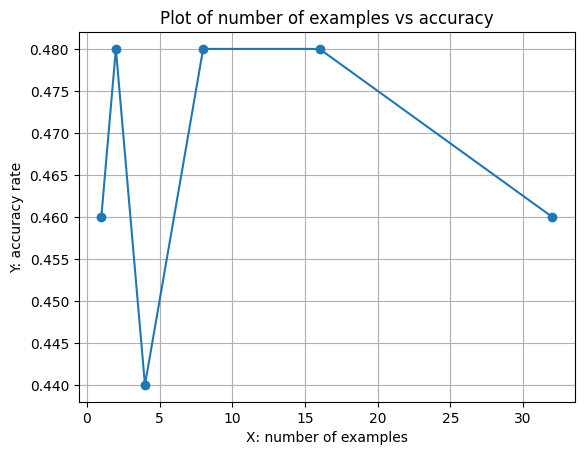

In [116]:
few_shot_plot_X = []
few_shot_plot_y = []
num_sample = len(arithmetic_X)
for num_example in result_dict:
  few_shot_plot_X.append(num_example)
  few_shot_plot_y.append(result_dict[num_example] / num_sample)

import matplotlib.pyplot as plt

# Create the plot
plt.plot(few_shot_plot_X, few_shot_plot_y, marker='o')  # You can also use scatter(x, y) for scatter plot
plt.xlabel('X: number of examples')
plt.ylabel('Y: accuracy rate')
plt.title('Plot of number of examples vs accuracy')
plt.grid(True)
plt.show()


In [122]:
result_dict

{1: 23, 2: 24, 4: 22, 8: 24, 16: 24, 32: 23}

In [117]:
cot_examples = []
cot_examples.append("61 + 7 * 2 = 66?\n7 * 2 =14. 61 + 14 = 75\n")
cot_examples.append("2 * 4 + 2 = 10?\n2 * 4 = 8. 8 + 2 = 10\n")
cot_examples.append("61 * 7 * 2 = 854?\n61 * 7 = 427. 427 * 2 = 854\n")
cot_examples.append("5 - 2 * 4 = -1?\n2 * 4 = 8. 5 - 8 = -3\n")
cot_examples.append("3 * 15 + 1 = 46?\n3 * 15 = 45. 45 + 1 = 46\n")
cot_examples.append("9 + 7 - 22 = -6?\n9 + 7 = 16. 16 - 22 = -6\n")
cot_examples.append("3 * 5 + 1 = 16?\n3 * 5 = 15. 15 + 1 = 16\n")
cot_examples.append("6 * 22 + 3 = 135?\n6 * 22 = 132. 132 + 3 = 135\n")
cot_examples.append("4 * 3 + 6 = 18?\n4 * 3 = 12. 12 + 6 = 18\n")
cot_examples.append("7 * 1 + 5 = 12?\n7 * 1 = 7. 7 + 5 = 12\n")
cot_examples.append("2 * 6 + 4 = 16?\n2 * 6 = 12. 12 + 4 = 16\n")
cot_examples.append("5 * 3 + 2 = 17?\n5 * 3 = 15. 15 + 2 = 17\n")
cot_examples.append("8 * 2 + 1 = 17?\n8 * 2 = 16. 16 + 1 = 17\n")
cot_examples.append("9 * 1 + 7 = 16?\n9 * 1 = 9. 9 + 7 = 16\n")
cot_examples.append("3 * 7 + 2 = 23?\n3 * 7 = 21. 21 + 2 = 23\n")
cot_examples.append("5 * 4 + 6 = 26?\n5 * 4 = 20. 20 + 6 = 26\n")
cot_examples.append("6 * 3 + 1 = 19?\n6 * 3 = 18. 18 + 1 = 19\n")
cot_examples.append("2 * 9 + 5 = 23?\n2 * 9 = 18. 18 + 5 = 23\n")
cot_examples.append("2 + 3 * 4 = 14?\n3 * 4 = 12. 2 + 12 = 14\n")
cot_examples.append("8 - 2 * 3 = 2?\n2 * 3 = 6. 8 - 6 = 2\n")
cot_examples.append("5 * 2 - 1 = 9?\n5 * 2 = 10. 10 - 1 = 9\n")
cot_examples.append("10 - 3 + 2 = 9?\n10 - 3 = 7. 7 + 2 = 9\n")
cot_examples.append("2 * 5 + 6 = 16?\n2 * 5 = 10. 10 + 6 = 16\n")
cot_examples.append("7 + 2 * 3 = 13?\n2 * 3 = 6. 7 + 6 = 13\n")
cot_examples.append("9 - 4 + 1 = 6?\n9 - 4 = 5. 5 + 1 = 6\n")
cot_examples.append("3 + 6 * 2 = 15?\n6 * 2 = 12. 3 + 12 = 15\n")
cot_examples.append("4 * 3 - 5 = 7?\n4 * 3 = 12. 12 - 5 = 7\n")
cot_examples.append("7 - 2 + 6 = 11?\n7 - 2 = 5. 5 + 6 = 11\n")
cot_examples.append("8 + 1 * 5 = 13?\n1 * 5 = 5. 8 + 5 = 13\n")
cot_examples.append("10 - 4 * 2 = 2?\n4 * 2 = 8. 10 - 8 = 2\n")
cot_examples.append("6 * 3 + 2 = 20?\n6 * 3 = 18. 18 + 2 = 20\n")
cot_examples.append("9 + 3 - 4 = 8?\n9 + 3 = 12. 12 - 4 = 8\n")
cot_examples.append("2 * 7 - 3 = 11?\n2 * 7 = 14. 14 - 3 = 11\n")

In [118]:
COT_ONE_EXAMPLE_SHOT_PROMPT = "".join(cot_examples[:1]) + "{input}?"
COT_TWO_EXAMPLE_SHOT_PROMPT = "".join(cot_examples[:2]) + "{input}?"
COT_FOUR_EXAMPLE_SHOT_PROMPT = "".join(cot_examples[:4]) + "{input}?"
COT_EIGHT_EXAMPLE_SHOT_PROMPT = "".join(cot_examples[:8]) + "{input}?"
COT_SIXTEEN_EXAMPLE_SHOT_PROMPT = "".join(cot_examples[:16]) + "{input}?"
COT_THIRTY_TWO_EXAMPLE_SHOT_PROMPT = "".join(cot_examples[:32]) + "{input}?"

In [119]:
cot_prompts = [COT_ONE_EXAMPLE_SHOT_PROMPT, COT_TWO_EXAMPLE_SHOT_PROMPT, COT_FOUR_EXAMPLE_SHOT_PROMPT, COT_EIGHT_EXAMPLE_SHOT_PROMPT, COT_SIXTEEN_EXAMPLE_SHOT_PROMPT,
COT_THIRTY_TWO_EXAMPLE_SHOT_PROMPT ]

cot_prompts_dict = {
    1: COT_ONE_EXAMPLE_SHOT_PROMPT,
    2: COT_TWO_EXAMPLE_SHOT_PROMPT,
    4: COT_FOUR_EXAMPLE_SHOT_PROMPT,
    8: COT_EIGHT_EXAMPLE_SHOT_PROMPT,
    16: COT_SIXTEEN_EXAMPLE_SHOT_PROMPT,
    32: COT_THIRTY_TWO_EXAMPLE_SHOT_PROMPT
}

In [ ]:
result_dict = {}
for num_example in few_shot_prompt_dict:
  few_shot_prompt = few_shot_prompt_dict[num_example]
  correct = 0
  n = len(arithmetic_X)
  for i in range(n):
    formula = arithmetic_X[i]
    answer = arithmetic_y[i]
    result = run_gpt3(few_shot_prompt.replace("{input}", formula), instruction_tuned=True)
    final_result = extract_number(result)
    if answer == final_result:
      correct += 1
    else:
      print("num_example [{}] formula: [{}] answer: [{}] result: [{}] final_result: [{}]".format(num_example, formula, answer, result, final_result))
  print("number of example: {} correct: {}".format(num_example, correct))
  result_dict[num_example] = correct

In [120]:
cot_result_dict = {}
n = len(arithmetic_X)
for num_example in cot_prompts_dict:
  cot_shot_prompt = cot_prompts_dict[num_example]
  correct = 0
  for i in range(n):
    formula = arithmetic_X[i]
    answer = arithmetic_y[i]
    result = run_gpt3(cot_shot_prompt.replace("{input}", formula), instruction_tuned=True)
    try:
      final_result = extract_number(result)
      if answer == final_result:
        correct += 1
      else:
        print("num_example [{}] formula: [{}] answer: [{}] result: [{}] final_result: [{}]".format(num_example, formula, answer, result, final_result))
    except Exception as e:
      print("num_example [{}] formula: [{}] answer: [{}] result: [{}] ".format(num_example, formula, answer, result))
  print("number of example: {} correct: {}".format(num_example, correct))
  cot_result_dict[num_example] = correct

num_example [1] formula: [183 * 149 + 161] answer: [27428] result: [27287] final_result: [27287]
num_example [1] formula: [60 * 176 * 149] answer: [1573440] result: [60 * 176 * 149 = 1,763,040] final_result: [1763040]
num_example [1] formula: [164 - 21 * 127] answer: [-2503] result: [21 * 127 = 2677. 164 - 2677 = -2513] final_result: [-2513]
num_example [1] formula: [107 - 126 * 103] answer: [-12871] result: [107 - 126 * 103 = -12,845] final_result: [-12845]
num_example [1] formula: [78 * 184 * 28] answer: [401856] result: [78 * 184 * 28 = 3,096,384] final_result: [3096384]
num_example [1] formula: [165 * 53 * 196] answer: [1714020] result: [165 * 53 * 196 = 1,717,940] final_result: [1717940]
num_example [1] formula: [173 * 152 + 185] answer: [26481] result: [26,441 + 185 = 26,626] final_result: [26626]
num_example [1] formula: [111 * 127 + 77] answer: [14174] result: [111 * 127 = 14157. 14157 + 77 = 14234] final_result: [14234]
num_example [1] formula: [77 * 55 * 37] answer: [156695] 

In [123]:
cot_result_dict

{1: 40, 2: 39, 4: 45, 8: 30, 16: 37, 32: 40}

In [ ]:
COT_TWO_EXAMPLE_SHOT_PROMPT.replace("{input}", "173 + 16 * 80")

'2 * 4 + 2 = 10?\n2 * 4 = 8. 8 + 2 = 10\n61 + 7 * 2 = 66?\n7 * 2 =14. 61 + 14 = 75\n173 + 16 * 80?'

In [ ]:
result = run_gpt3(COT_TWO_EXAMPLE_SHOT_PROMPT.replace("{input}", "173 + 16 * 80"), instruction_tuned=True)
final_result = int(result.split('=')[-1].strip())
final_result

1453

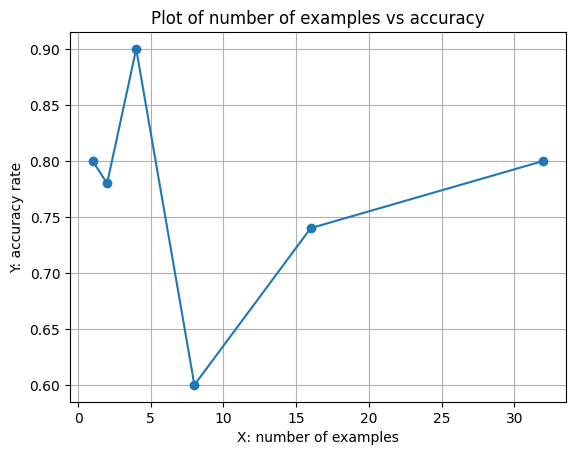

In [121]:
cot_plot_X = []
cot_plot_y = []
num_sample = len(arithmetic_X)
for num_example in cot_result_dict:
  cot_plot_X.append(num_example)
  cot_plot_y.append(cot_result_dict[num_example] / num_sample)

import matplotlib.pyplot as plt

# Create the plot
plt.plot(cot_plot_X, cot_plot_y, marker='o')  # You can also use scatter(x, y) for scatter plot
plt.xlabel('X: number of examples')
plt.ylabel('Y: accuracy rate')
plt.title('Plot of number of examples vs accuracy')
plt.grid(True)
plt.show()


# Submissions

## Free-response Checklist (check if you missed anything!)
We will look for the following free-responses in this notebook:
- Section 2: Question responses
- Section 3: Question response
- Section 4: Question response
- Section 5: Table/Plot and short write-up

## GradeScope File Submission
Here are the deliverables you need to submit to GradeScope:
- Write-up:
    - Answers to all questions labeled as `Answer #.#` in a file named `writeup.pdf`
- Code:
    - This notebook and py file: rename to `homework8.ipynb` and `homework8.py`. You can download the notebook and py file by going to the top-left corner of this webpage, `File -> Download -> Download .ipynb/.py`